## load train data

In [48]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

dir = 'C:\\Users\\Richie Lee\\Desktop\\College\\1 San Jose State University\\9 2021 fall semester\\CMPE 188\\hw2&hw3\\photos\\train_set'
train_dir = './datasets/train_set/'

targets = ['buildings','forest','glacier','mountain','sea','street']
train_data = []
#load train set
for target in targets:
    train_path = os.path.join(train_dir,target)
    label = targets.index(target)
    for img in os.listdir(train_path):
        train_imgpath = os.path.join(train_path, img) #train_imgpath = './xxx/xxx/xxx.jpg'
        train_img = plt.imread(train_imgpath)
        try:
            train_img = cv2.resize(train_img,(144,144)) #**very impoertant step
            train_image = np.array(train_img)#.flatten()
            train_data.append([train_image,label])
        except Exception as e:
            pass

len(train_data)

14338

In [49]:
# [1,2,3] -> 0
# [12,12,33] -> 2

In [50]:
random.shuffle(train_data)
train_data

[[array([[[230, 216, 213],
          [228, 217, 212],
          [226, 216, 211],
          ...,
          [106, 148, 186],
          [102, 144, 182],
          [ 97, 139, 177]],
  
         [[219, 205, 202],
          [216, 205, 201],
          [214, 205, 200],
          ...,
          [ 89, 130, 168],
          [ 89, 131, 169],
          [ 89, 131, 169]],
  
         [[207, 196, 192],
          [205, 194, 190],
          [202, 193, 188],
          ...,
          [ 89, 128, 167],
          [ 89, 128, 167],
          [ 90, 129, 168]],
  
         ...,
  
         [[127, 122, 116],
          [154, 150, 141],
          [137, 132, 126],
          ...,
          [ 48,  58,  73],
          [ 35,  42,  60],
          [ 24,  31,  48]],
  
         [[141, 138, 133],
          [123, 120, 113],
          [118, 115, 110],
          ...,
          [ 83,  92, 101],
          [ 79,  85,  97],
          [ 78,  85,  95]],
  
         [[129, 128, 123],
          [112, 110, 105],
          [104, 103,  98

### train data has been shuffled before here 

In [51]:
features = []
labels = []

for feature, label in train_data:
    features.append(feature)
    labels.append(label)
    
features

[array([[[230, 216, 213],
         [228, 217, 212],
         [226, 216, 211],
         ...,
         [106, 148, 186],
         [102, 144, 182],
         [ 97, 139, 177]],
 
        [[219, 205, 202],
         [216, 205, 201],
         [214, 205, 200],
         ...,
         [ 89, 130, 168],
         [ 89, 131, 169],
         [ 89, 131, 169]],
 
        [[207, 196, 192],
         [205, 194, 190],
         [202, 193, 188],
         ...,
         [ 89, 128, 167],
         [ 89, 128, 167],
         [ 90, 129, 168]],
 
        ...,
 
        [[127, 122, 116],
         [154, 150, 141],
         [137, 132, 126],
         ...,
         [ 48,  58,  73],
         [ 35,  42,  60],
         [ 24,  31,  48]],
 
        [[141, 138, 133],
         [123, 120, 113],
         [118, 115, 110],
         ...,
         [ 83,  92, 101],
         [ 79,  85,  97],
         [ 78,  85,  95]],
 
        [[129, 128, 123],
         [112, 110, 105],
         [104, 103,  98],
         ...,
         [ 36,  45,  52],
  

In [52]:
np_features = np.array(features)
np_lables = np.array(labels)
np_features = np_features.astype(np.int32)
np_lables

array([4, 5, 3, ..., 1, 1, 2])

In [58]:
np_features.shape

(14338, 144, 144, 3)

In [74]:
%matplotlib inline

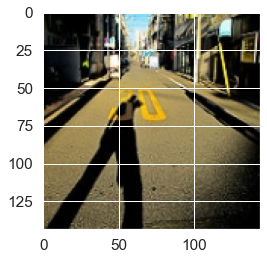

In [75]:
plt.imshow(np_features[242])

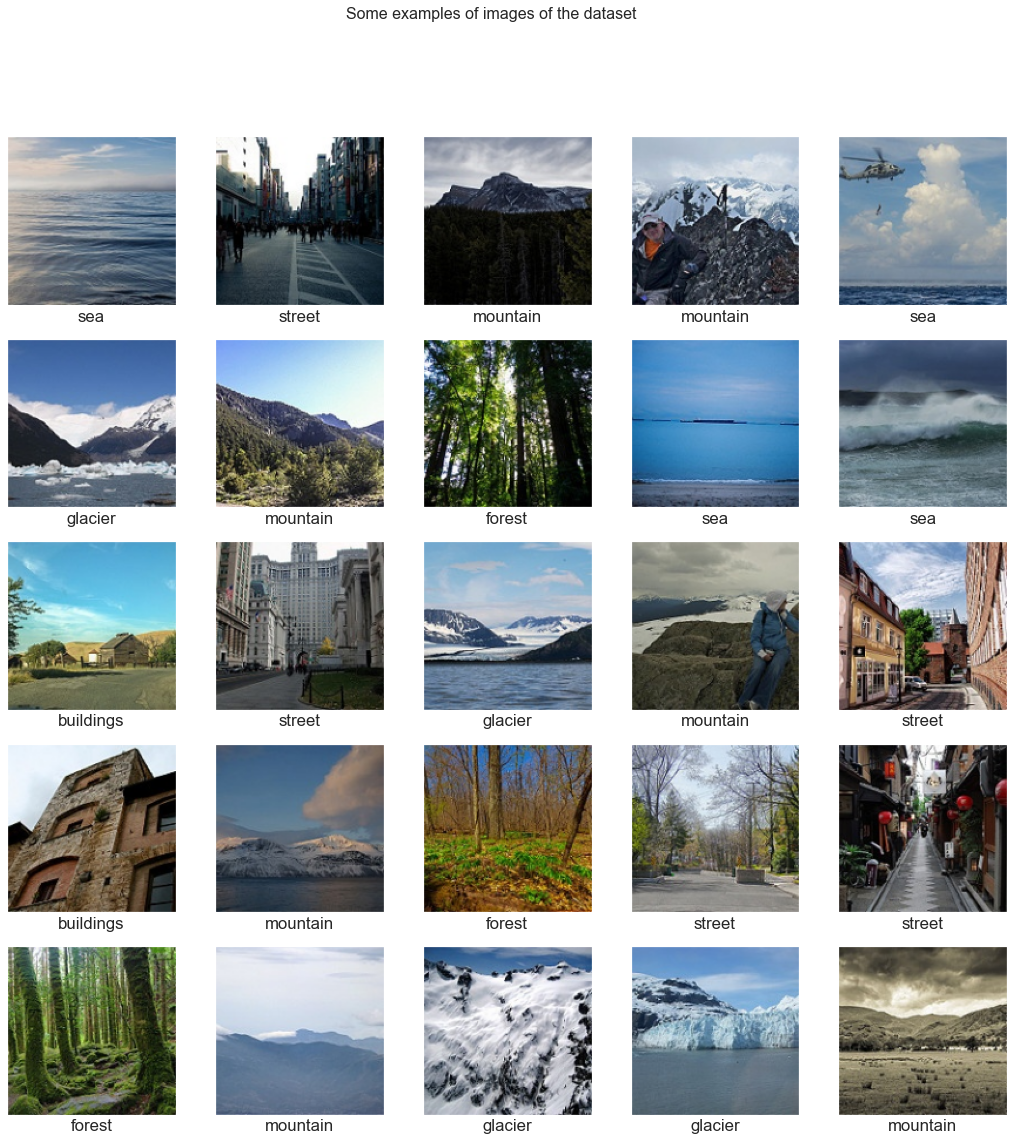

In [155]:
fig = plt.figure(figsize=(18,18))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_features[i], cmap=plt.cm.binary)
    plt.xlabel(targets[np_lables[i]])
plt.show()

### Convert the images to grayscale colorspace before calculating the HOG features for each image

In [9]:
# from skimage import color
# data_gray = [ color.rgb2gray(i) for i in np_features]


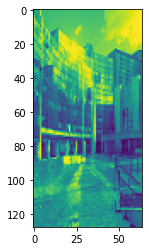

In [10]:
# plt.imshow(data_gray[0])

## generate Hog features for train data

In [65]:
from skimage.feature import hog

hog_images = []
hog_features = []
for image in np_features:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),cells_per_block=(1,1),
                       block_norm= 'L2',visualize=True, multichannel=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [119]:
hog_features[5]

array([0.15143767, 0.11006336, 0.30316424, 0.33178413, 0.82834865,
       0.23151919, 0.14983739, 0.02737804, 0.12460101, 0.01723868,
       0.29214096, 0.14519653, 0.87663783, 0.26051878, 0.19750379,
       0.04875835, 0.19575023, 0.01990858, 0.35881735, 0.10455607,
       0.87869554, 0.18897358, 0.1111751 , 0.03777387, 0.18012238,
       0.05739378, 0.27103236, 0.08116707, 0.91075639, 0.15947117,
       0.16762138, 0.03478589, 0.15732722, 0.0476207 , 0.28146599,
       0.05612152, 0.91029046, 0.17639426, 0.17424149, 0.02244861,
       0.19373243, 0.03078589, 0.28222009, 0.11124058, 0.9034189 ,
       0.17105339, 0.15515267, 0.        , 0.22209971, 0.04760433,
       0.41652274, 0.17913005, 0.71642359, 0.37035806, 0.29546406,
       0.07141375, 0.07564767, 0.02306119, 0.28335372, 0.07869618,
       0.90772143, 0.18736103, 0.21954691, 0.        , 0.14019427,
       0.06253246, 0.29468711, 0.10360437, 0.89653691, 0.24509892,
       0.12251118, 0.        , 0.09031516, 0.05872383, 0.38389

In [67]:
np_hog_features = np.array(hog_features)
np_hog_features.shape

(14338, 648)

In [68]:
np_hog_images = np.array(hog_images)
np_hog_images.shape

(14338, 144, 144)

(14338, 144, 144)

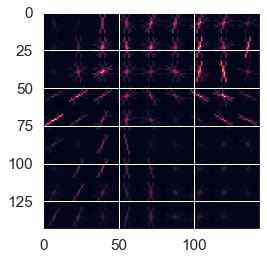

In [76]:
plt.imshow(np_hog_images[242])
np_hog_images.shape

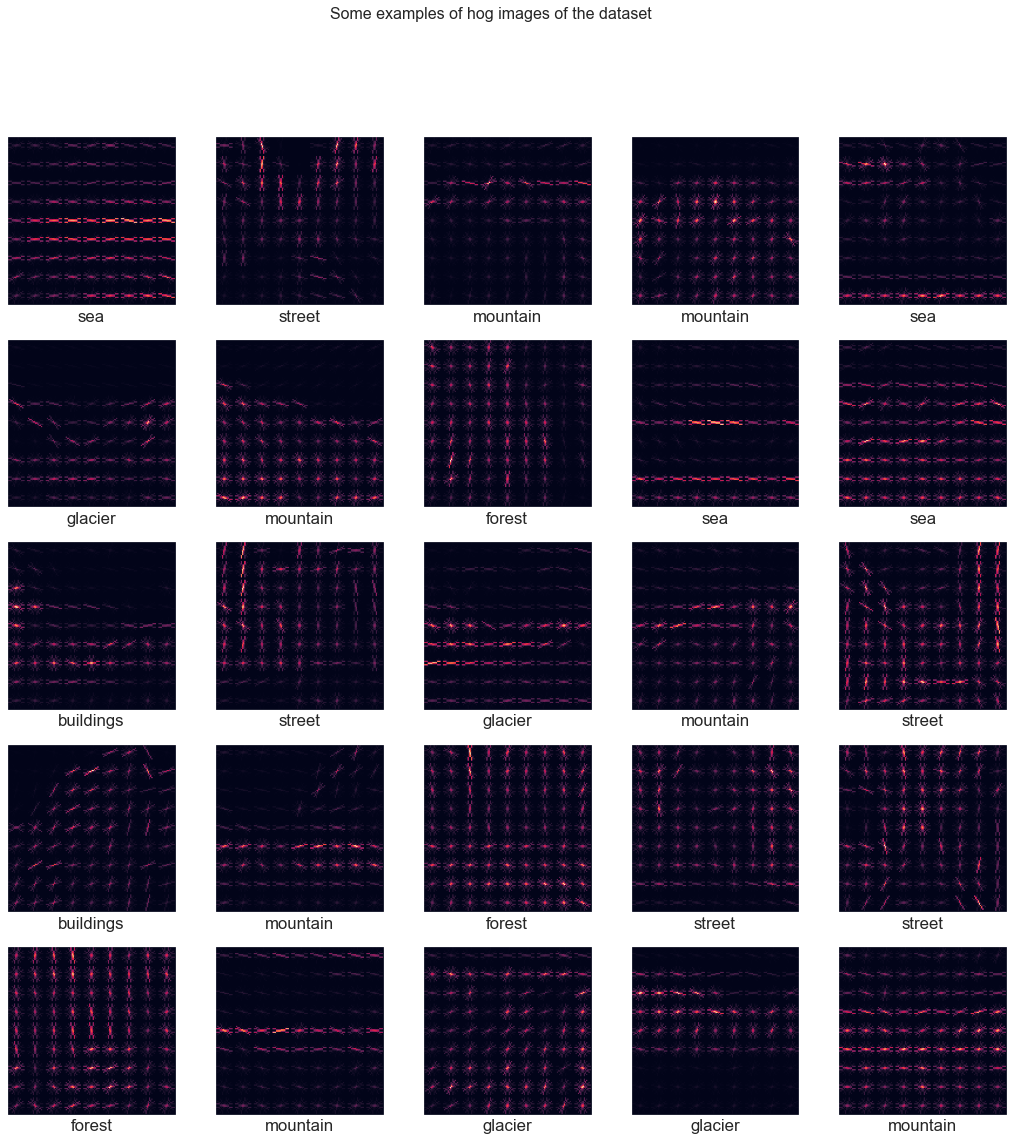

In [159]:
fig_hog = plt.figure(figsize=(18,18))
fig_hog.suptitle("Some examples of hog images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np_hog_images[i])
    plt.xlabel(targets[np_lables[i]])
plt.show()

### PCA

In [77]:
from sklearn.decomposition import PCA
pca_90 = PCA(n_components=0.90,svd_solver='full')
np_hog_features_pca = pca_90.fit_transform(np_hog_features)
np_hog_features_pca.shape

(14338, 306)

In [168]:
pca_90.explained_variance_ratio_

array([0.21470116, 0.0444734 , 0.03626266, 0.02730386, 0.02291226,
       0.01843893, 0.01774467, 0.01619752, 0.01361053, 0.01220697,
       0.01199748, 0.01127364, 0.01087295, 0.01020755, 0.007552  ,
       0.00725245, 0.00697165, 0.00665995, 0.00605883, 0.00583618,
       0.00576303, 0.00556105, 0.00544308, 0.00540239, 0.00509904,
       0.00498487, 0.00488039, 0.0045292 , 0.00441414, 0.00429115,
       0.00419931, 0.00401733, 0.0038629 , 0.00373547, 0.00369383,
       0.00367432, 0.00356288, 0.00353169, 0.00346413, 0.00334887,
       0.00331037, 0.00323649, 0.00311291, 0.00309221, 0.00301494,
       0.00297988, 0.00297205, 0.00287725, 0.00284672, 0.00283468,
       0.00272814, 0.00269106, 0.00266622, 0.00257721, 0.00254319,
       0.00252143, 0.00248712, 0.00243922, 0.00239202, 0.00238511,
       0.00235497, 0.00227108, 0.00225449, 0.00223999, 0.00223024,
       0.00217465, 0.00214647, 0.00210776, 0.00206222, 0.00204769,
       0.00200097, 0.0019846 , 0.00198127, 0.00195286, 0.00192

## grid search

In [78]:
np_hog_features_pca.shape

(14338, 306)

In [89]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(), {
    'C': [2,3,4,5],
    'kernel': ['rbf']
}, cv=4, return_train_score=False)
clf.fit(np_hog_features_pca, np_lables)
clf.cv_results_

{'mean_fit_time': array([10.25827974, 11.01466691, 11.24136394, 11.56312919]),
 'std_fit_time': array([0.3156061 , 0.79041927, 0.22896562, 0.09512709]),
 'mean_score_time': array([7.36697757, 7.35531974, 7.20092195, 7.27373427]),
 'std_score_time': array([0.11636198, 0.32675216, 0.03593195, 0.01034968]),
 'param_C': masked_array(data=[2, 3, 4, 5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 2, 'kernel': 'rbf'},
  {'C': 3, 'kernel': 'rbf'},
  {'C': 4, 'kernel': 'rbf'},
  {'C': 5, 'kernel': 'rbf'}],
 'split0_test_score': array([0.7832636 , 0.78521618, 0.78493724, 0.78688982]),
 'split1_test_score': array([0.77266388, 0.77405858, 0.7762901 , 0.77684798]),
 'split2_test_score': array([0.78962054, 0.78962054, 0.78515625, 0.78320312]),
 'split3_test_score

In [90]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

param_C param_kernel  mean_test_score
0       2          rbf         0.779537
1       3          rbf         0.781420
2       4          rbf         0.781211
3       5          rbf         0.781420

## Model training

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np_hog_features_pca, np_lables, test_size= 0.25106)

In [80]:
X_train.shape

(10738, 306)

In [91]:
from sklearn.svm import SVC
svc_model = SVC(C=3)

In [82]:
y_train.shape

(10738,)

In [130]:
svc_model.fit(X_train, y_train)

SVC(C=3)

In [131]:
%%time
y_pred = svc_model.predict(X_test)

Wall time: 7.41 s


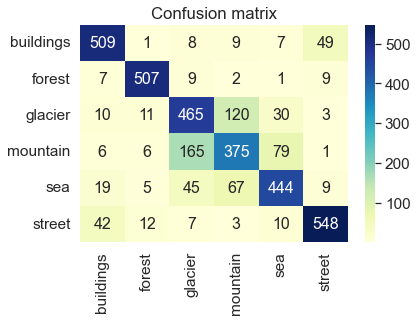

In [138]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
# %matplotlib inline
CM = confusion_matrix(y_test, y_pred)
ax = plt.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=targets, yticklabels=targets, ax = ax, fmt="d",cmap='YlGnBu')
ax.set_title('Confusion matrix')
plt.show()

In [133]:
svc_model.score(X_test, y_test)

0.7911111111111111

## load train data

In [93]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
#load test set
test_data = []
test_dir = './datasets/test_set/'

for img in os.listdir(test_dir):
    path = os.path.join(test_dir, img)
    test_img = plt.imread(path)
    
    try:
        test_img = cv2.resize(test_img,(144,144))
        image = np.array(test_img)
        test_data.append([image,img])
    except Exception as e:
        pass

len(test_data)

3600

In [95]:
test_features = []
image_ids = []

for test_feature, image_id in test_data:
    test_features.append(test_feature)
    image_ids.append(image_id)

In [104]:
np_test_features = np.array(test_features)
np_test_features = np_test_features.astype(np.int32) #very important!!!
np_image_ids = np.array(image_ids)
np_test_features.shape

(3600, 144, 144, 3)

In [105]:
%matplotlib inline

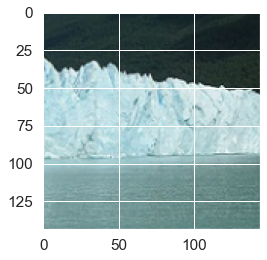

In [106]:
plt.imshow(np_test_features[123])

In [107]:
np_image_ids[123]

'13056.jpg'

In [103]:
# from skimage import color
# test_data_gray = [ color.rgb2gray(i) for i in np_test_features]

In [326]:
# test_data_gray[123]

array([[3.41432635e-08, 2.57613603e-08, 2.18036585e-08, ...,
        2.12310348e-08, 1.76718459e-08, 1.45783182e-08],
       [2.06390861e-08, 2.43643764e-08, 2.59946100e-08, ...,
        1.66079961e-08, 1.39465556e-08, 1.31813344e-08],
       [2.43643764e-08, 2.43643764e-08, 2.31670681e-08, ...,
        1.56766735e-08, 1.48778781e-08, 1.41126569e-08],
       ...,
       [6.93136826e-08, 7.14078080e-08, 6.80492260e-08, ...,
        5.62760979e-08, 5.39477915e-08, 5.34821302e-08],
       [6.93136826e-08, 7.04764854e-08, 6.70843292e-08, ...,
        5.72074205e-08, 5.34821302e-08, 5.20851463e-08],
       [6.79166988e-08, 6.20945823e-08, 6.67511951e-08, ...,
        5.62760979e-08, 5.72074205e-08, 5.81387431e-08]])

## generate Hog features for test data

In [108]:
from skimage.feature import hog

hog_test_images = []
hog_test_features = []
for test_image in np_test_features:
    fd,hog_image_test = hog(test_image, orientations=8, pixels_per_cell=(16,16),
                            cells_per_block=(1, 1),block_norm= 'L2',visualize=True,multichannel=True)
    hog_test_images.append(hog_image_test)
    hog_test_features.append(fd)

In [109]:
len(hog_test_features)

3600

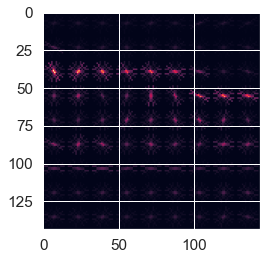

In [110]:
plt.imshow(hog_test_images[123])

In [111]:
np_hog_test_images = np.array(hog_test_images)
np_hog_test_images.shape

(3600, 144, 144)

In [115]:
hog_test_features[33]

array([0.61079508, 0.23199029, 0.14476692, 0.17816663, 0.12781424,
       0.17123291, 0.22063764, 0.65274107, 0.77662813, 0.20923553,
       0.18736642, 0.12880615, 0.14502259, 0.10848659, 0.1901353 ,
       0.48209928, 0.43908112, 0.30741992, 0.73185287, 0.18818622,
       0.19073132, 0.14146159, 0.14448898, 0.25379363, 0.5965094 ,
       0.26050957, 0.27014071, 0.61767061, 0.14098093, 0.18227275,
       0.15424282, 0.21196343, 0.63245533, 0.14851167, 0.15401468,
       0.49292848, 0.27788323, 0.11220756, 0.11843155, 0.45542274,
       0.73324089, 0.17717305, 0.13335444, 0.09897349, 0.18455233,
       0.06550288, 0.1423203 , 0.58718234, 0.65443128, 0.17147676,
       0.13758935, 0.20930943, 0.40657497, 0.1096725 , 0.15415285,
       0.52771184, 0.61053686, 0.2206233 , 0.23371892, 0.19554677,
       0.28473862, 0.0768115 , 0.24712315, 0.58108613, 0.55104343,
       0.41104918, 0.52750953, 0.25360586, 0.18882708, 0.15478138,
       0.14943229, 0.32072501, 0.52131275, 0.19859696, 0.23635

In [120]:
np_hog_test_features = np.array(hog_test_features)
np_hog_test_features.shape

(3600, 648)

### Apply PCA to test features

In [121]:
np_hog_test_features_pca = pca_90.transform(np_hog_test_features)
np_hog_test_features_pca.shape

(3600, 306)

In [123]:
svc_model.get_params

<bound method BaseEstimator.get_params of SVC(C=3)>

In [125]:
%%time
kaggle_predict = svc_model.predict(np_hog_test_features_pca)

Wall time: 9.6 s


In [126]:
kaggle_predict

array([5, 0, 0, ..., 2, 1, 2])

In [127]:
import pandas as pd
df = pd.DataFrame()
df['Id'] = np_image_ids
df['Category'] = kaggle_predict

In [128]:
df.to_csv('PCA_svm_prediction_v2.2.csv')
csv = pd.read_csv('PCA_svm_prediction_v2.2.csv')
csv

Unnamed: 0                          Id  Category
0              0      1000 - Copy - Copy.jpg         5
1              1                   10113.jpg         0
2              2                   10144.jpg         0
3              3                   10151.jpg         0
4              4                   10161.jpg         0
...          ...                         ...       ...
3595        3595              991 - Copy.jpg         0
3596        3596  9943 - Copy (2) - Copy.jpg         2
3597        3597  9951 - Copy (2) - Copy.jpg         2
3598        3598                     997.jpg         1
3599        3599   998 - Copy (2) - Copy.jpg         2

[3600 rows x 3 columns]

## kaggle score 0.80436

In [242]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4)

In [243]:
X_train.shape

(10738, 600)

In [244]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [245]:
knn_model.score(X_test, y_test)

0.5152777777777777

In [157]:
model.score(X_test, y_test)

0.5125